# Search Algorithm Homework - CMPE 252
#### Jesus David Montes

In [1]:
# Imports
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## Load Map Data from SGB 128

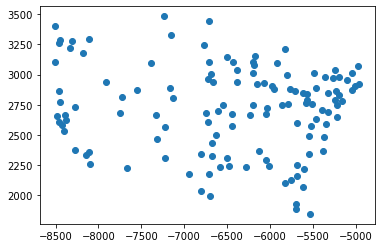

In [2]:
# XY Coordinates
x,y = np.loadtxt('sgb128_xy.txt', unpack=True) #xy coordinates
plt.scatter(x,y);

**Note:** The road distance file had a weird format, so a function was written to clean up the data

In [3]:
# Road Distances
distance_raw = np.loadtxt('sgb128_dist.txt')

In [4]:
# City Names
names = np.genfromtxt('sgb128_name.txt', dtype='str', delimiter='\n').tolist()
N = len(names) #number of nodes

## Create Network Graph

In [5]:
G = nx.Graph()
G_pos = {}

# Add Nodes
for i, name in enumerate(names):
    G.add_node(name, pos=(x[i], y[i]))
    G_pos[name] = (x[i], y[i])

### Distance Functions

In [6]:
# Distance Function
def euclid_distance(a, b):
    return np.linalg.norm(np.array(G_pos[a])-np.array(G_pos[b]))

# Provided Distance
def road_distance(a, b):
    i = names.index(a)
    j = names.index(b)
    if j > i:
        return distance_raw[j][j-i-1]
    elif j < i:
        return distance_raw[i][i-j-1]
    else:
        return 0

### Graph Edges

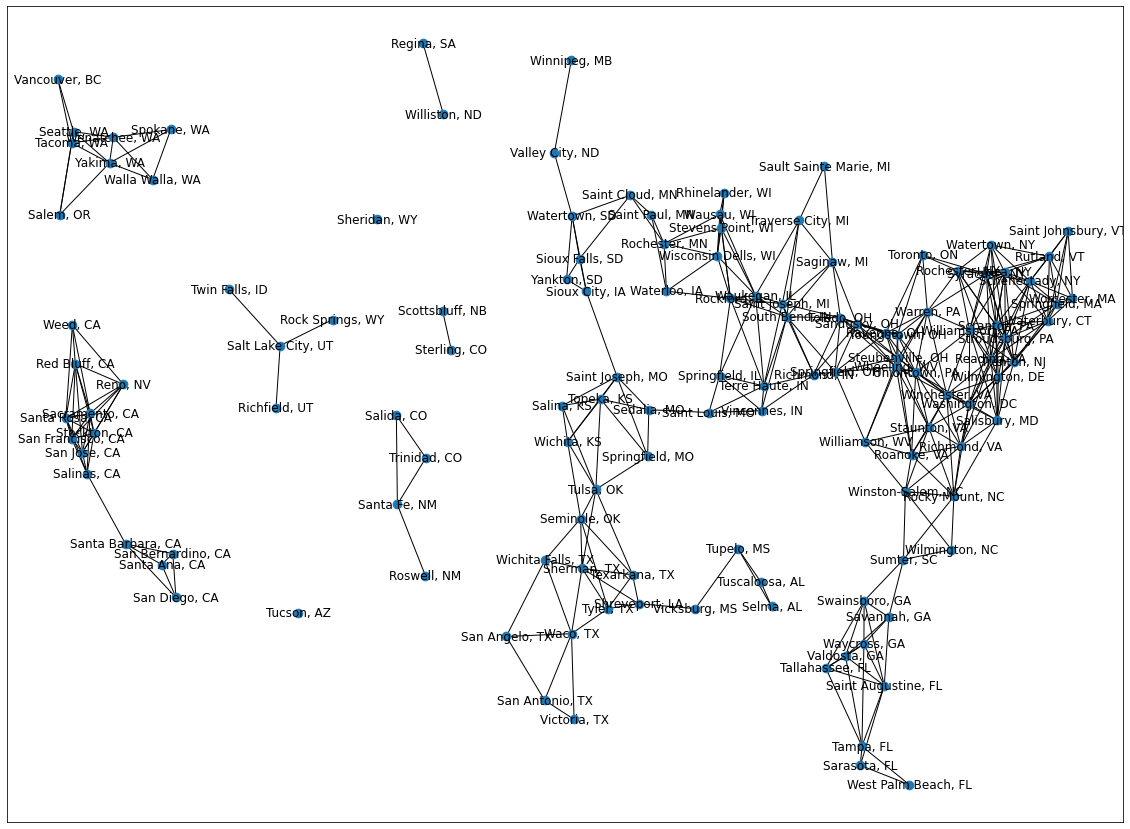

In [7]:
# Add Edges
for i, i_name in enumerate(names):
    for j, j_name in enumerate(names):
        e_dist = euclid_distance(i_name, j_name) #euclidian distance between two nodes
        if (i != j) and (e_dist <= 230):
            G.add_edge(i_name, j_name, drive=road_distance(i_name, j_name), dist=e_dist)

plt.figure(figsize=(20, 15))
nx.draw_networkx(G, pos=G_pos, node_size=75)

## Shortest Distance
### Start and Destination:

In [8]:
start = names[6]
destination = names[16]
print('Start: {}\t\tDestination: {}'.format(start, destination))

Start: Winnipeg, MB		Destination: West Palm Beach, FL


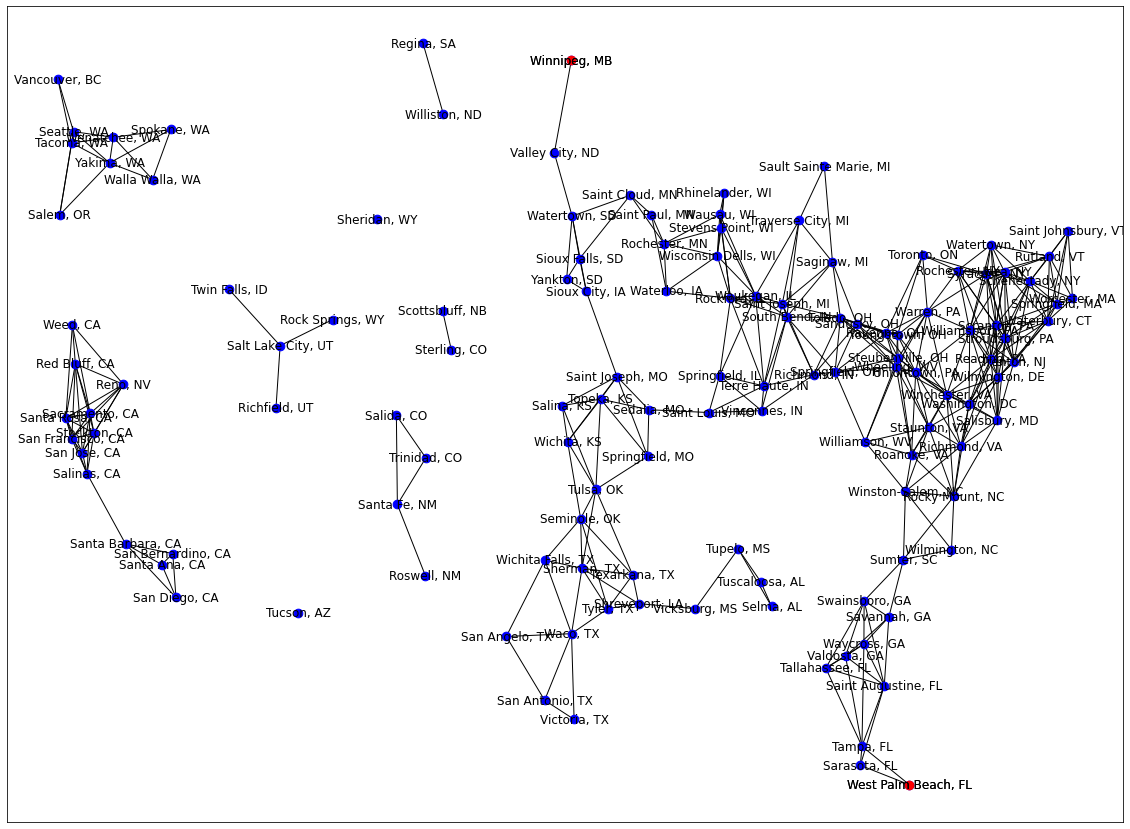

In [9]:
plt.figure(figsize=(20, 15))
nx.draw_networkx(G, pos=G_pos, node_size=75, node_color='blue')
nx.draw_networkx(G.subgraph([start, destination]), pos=G_pos, node_size=75, node_color='red')

#### Path Length Function:

In [10]:
def path_length(node_list, distance_calc):
    dist_list = []
    for i in range(len(node_list)-1):
        if distance_calc == 'euclidean':
            dist_list.append(euclid_distance(node_list[i], node_list[i+1]))
        elif distance_calc == 'road':
            dist_list.append(road_distance(node_list[i], node_list[i+1]))
    return np.sum(np.array(dist_list))

### No Heuristic A*

In [11]:
astar_path = nx.astar_path(G, start, destination, weight='drive')
print(astar_path)

['Winnipeg, MB', 'Valley City, ND', 'Watertown, SD', 'Saint Cloud, MN', 'Rochester, MN', 'Wisconsin Dells, WI', 'Waukegan, IL', 'South Bend, IN', 'Springfield, OH', 'Williamson, WV', 'Winston-Salem, NC', 'Sumter, SC', 'Savannah, GA', 'Waycross, GA', 'Tampa, FL', 'West Palm Beach, FL']


Total Path Length:
Euclidean = 2579.0928655741372 miles
Road = 2888.0 miles


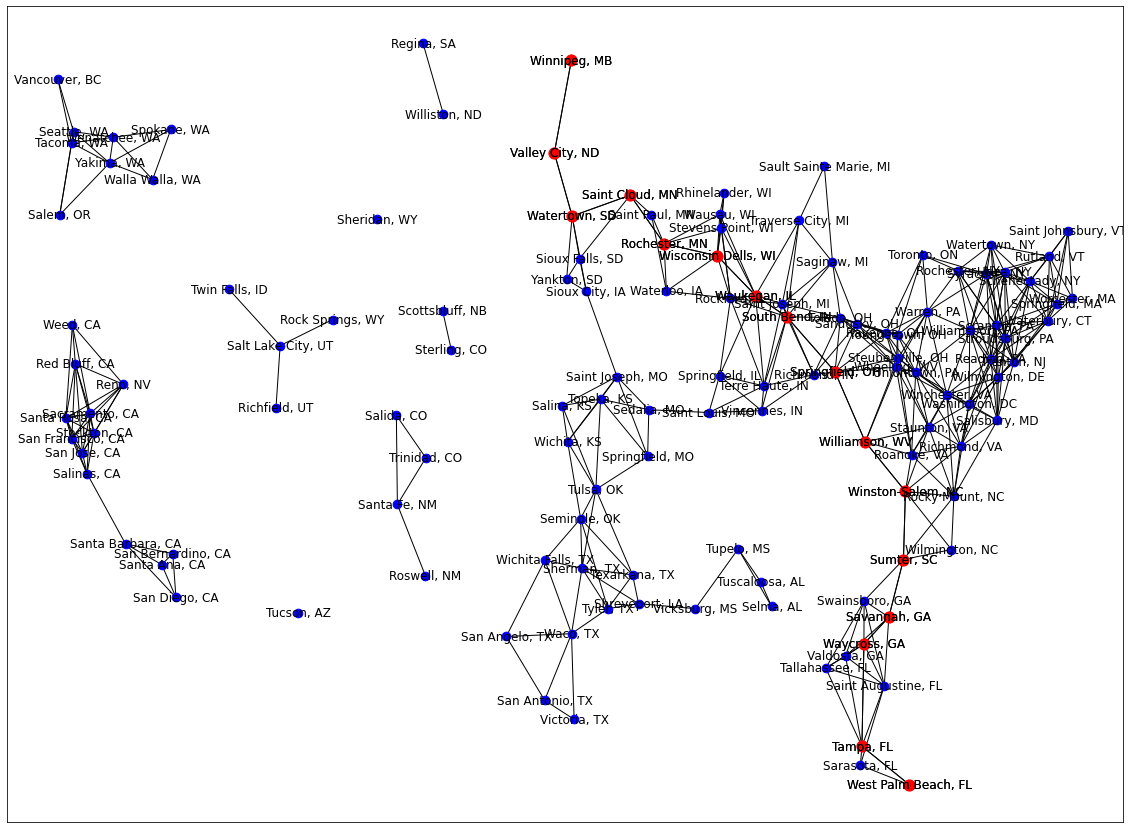

In [12]:
plt.figure(figsize=(20, 15))
nx.draw_networkx(G, pos=G_pos, node_size=75, node_color='blue')
nx.draw_networkx(G.subgraph(astar_path), pos=G_pos, node_size=125, node_color='red')

print('Total Path Length:')
print('Euclidean = {} miles'.format(path_length(astar_path, 'euclidean')))
print('Road = {} miles'.format(path_length(astar_path, 'road')))

### Heuristic A* Calculation

**Note:** I ran the algorithm with a heuristic weight of 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, and 10
However, to save space, I omitted the solutions that didn't change.

In [13]:
# Weighted Distance Function
h_weight = 1
def weighted_distance(a, b):
    return h_weight*euclid_distance(a, b)

#### Heuristic Weight = 0.5

['Winnipeg, MB', 'Valley City, ND', 'Watertown, SD', 'Saint Cloud, MN', 'Rochester, MN', 'Wisconsin Dells, WI', 'Waukegan, IL', 'South Bend, IN', 'Springfield, OH', 'Williamson, WV', 'Winston-Salem, NC', 'Sumter, SC', 'Savannah, GA', 'Waycross, GA', 'Tampa, FL', 'West Palm Beach, FL']

Total Path Length:
Euclidean = 2579.0928655741372 miles
Road = 2888.0 miles


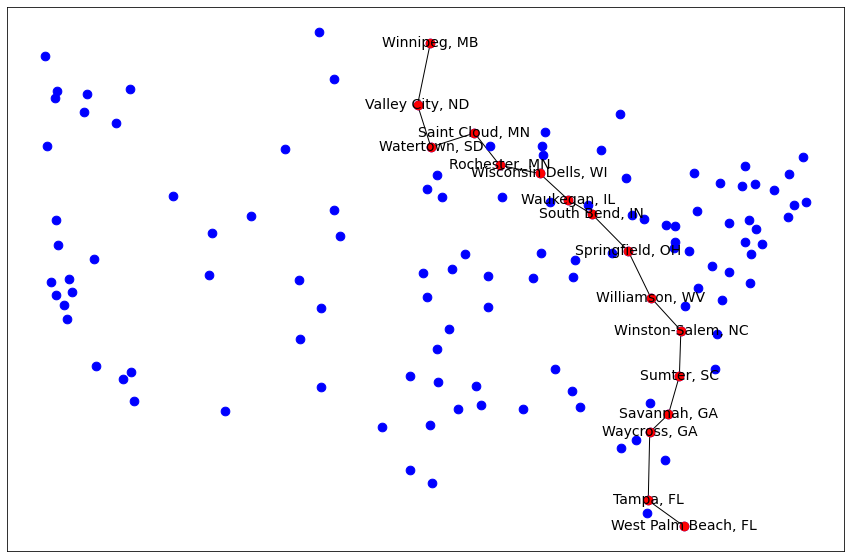

In [14]:
h_weight = 0.5
astar_path_h = astar_path = nx.astar_path(G, start, destination, heuristic=weighted_distance, weight='drive')
print(astar_path_h)

plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(G, pos=G_pos, node_size=75, node_color='blue')
nx.draw_networkx(G.subgraph(astar_path_h), pos=G_pos, node_size=75, node_color='red', font_size=14)

print('\nTotal Path Length:')
print('Euclidean = {} miles'.format(path_length(astar_path_h, 'euclidean')))
print('Road = {} miles'.format(path_length(astar_path_h, 'road')))

#### Heuristic Weight = 1

['Winnipeg, MB', 'Valley City, ND', 'Watertown, SD', 'Saint Cloud, MN', 'Rochester, MN', 'Wisconsin Dells, WI', 'Waukegan, IL', 'South Bend, IN', 'Springfield, OH', 'Williamson, WV', 'Winston-Salem, NC', 'Sumter, SC', 'Savannah, GA', 'Waycross, GA', 'Tampa, FL', 'West Palm Beach, FL']

Total Path Length:
Euclidean = 2579.0928655741372 miles
Road = 2888.0 miles


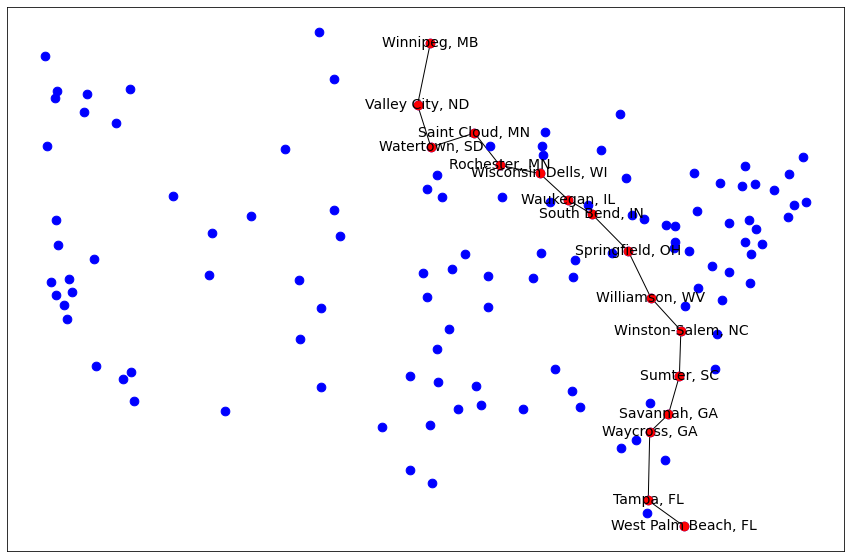

In [15]:
h_weight = 1
astar_path_h = astar_path = nx.astar_path(G, start, destination, heuristic=weighted_distance, weight='drive')
print(astar_path_h)

plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(G, pos=G_pos, node_size=75, node_color='blue')
nx.draw_networkx(G.subgraph(astar_path_h), pos=G_pos, node_size=75, node_color='red', font_size=14)

print('\nTotal Path Length:')
print('Euclidean = {} miles'.format(path_length(astar_path_h, 'euclidean')))
print('Road = {} miles'.format(path_length(astar_path_h, 'road')))

#### Heuristic Weight = 2

['Winnipeg, MB', 'Valley City, ND', 'Watertown, SD', 'Sioux City, IA', 'Saint Joseph, MO', 'Sedalia, MO', 'Saint Louis, MO', 'Terre Haute, IN', 'Richmond, IN', 'Springfield, OH', 'Williamson, WV', 'Winston-Salem, NC', 'Sumter, SC', 'Savannah, GA', 'Saint Augustine, FL', 'Tampa, FL', 'West Palm Beach, FL']

Total Path Length:
Euclidean = 2697.4477654895327 miles
Road = 3057.0 miles


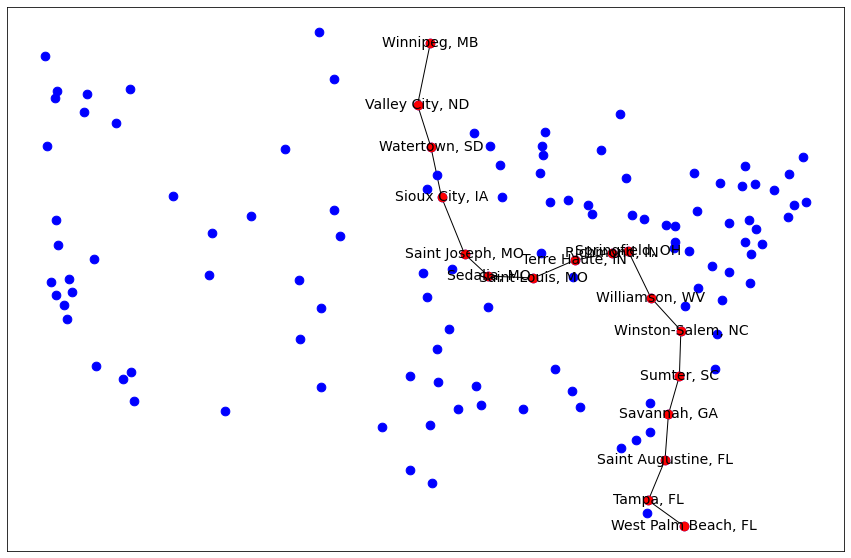

In [16]:
h_weight = 2
astar_path_h = astar_path = nx.astar_path(G, start, destination, heuristic=weighted_distance, weight='drive')
print(astar_path_h)

plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(G, pos=G_pos, node_size=75, node_color='blue')
nx.draw_networkx(G.subgraph(astar_path_h), pos=G_pos, node_size=75, node_color='red', font_size=14)

print('\nTotal Path Length:')
print('Euclidean = {} miles'.format(path_length(astar_path_h, 'euclidean')))
print('Road = {} miles'.format(path_length(astar_path_h, 'road')))

#### Heuristic Weight = 3 (Same result as 2)

#### Heuristic Weight = 4

['Winnipeg, MB', 'Valley City, ND', 'Watertown, SD', 'Sioux City, IA', 'Saint Joseph, MO', 'Sedalia, MO', 'Saint Louis, MO', 'Vincennes, IN', 'Richmond, IN', 'Springfield, OH', 'Williamson, WV', 'Winston-Salem, NC', 'Sumter, SC', 'Savannah, GA', 'Saint Augustine, FL', 'Tampa, FL', 'West Palm Beach, FL']

Total Path Length:
Euclidean = 2703.50003231324 miles
Road = 3092.0 miles


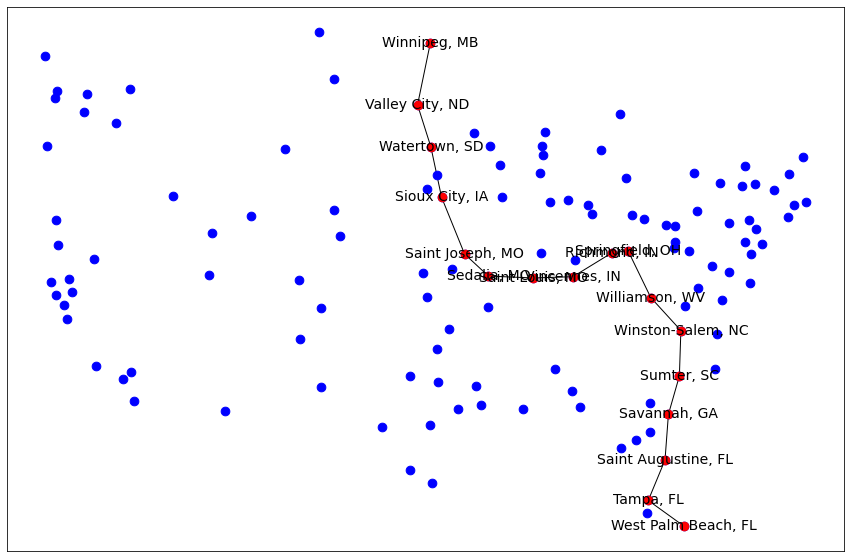

In [17]:
h_weight = 4
astar_path_h = astar_path = nx.astar_path(G, start, destination, heuristic=weighted_distance, weight='drive')
print(astar_path_h)

plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(G, pos=G_pos, node_size=75, node_color='blue')
nx.draw_networkx(G.subgraph(astar_path_h), pos=G_pos, node_size=75, node_color='red', font_size=14)

print('\nTotal Path Length:')
print('Euclidean = {} miles'.format(path_length(astar_path_h, 'euclidean')))
print('Road = {} miles'.format(path_length(astar_path_h, 'road')))

#### Heuristic Weight = 5 (Same result as 4)

##### Heuristic Weight = 6

['Winnipeg, MB', 'Valley City, ND', 'Watertown, SD', 'Sioux City, IA', 'Saint Joseph, MO', 'Sedalia, MO', 'Saint Louis, MO', 'Vincennes, IN', 'Richmond, IN', 'Springfield, OH', 'Williamson, WV', 'Winston-Salem, NC', 'Sumter, SC', 'Savannah, GA', 'Saint Augustine, FL', 'Sarasota, FL', 'West Palm Beach, FL']

Total Path Length:
Euclidean = 2733.6810630995165 miles
Road = 3126.0 miles


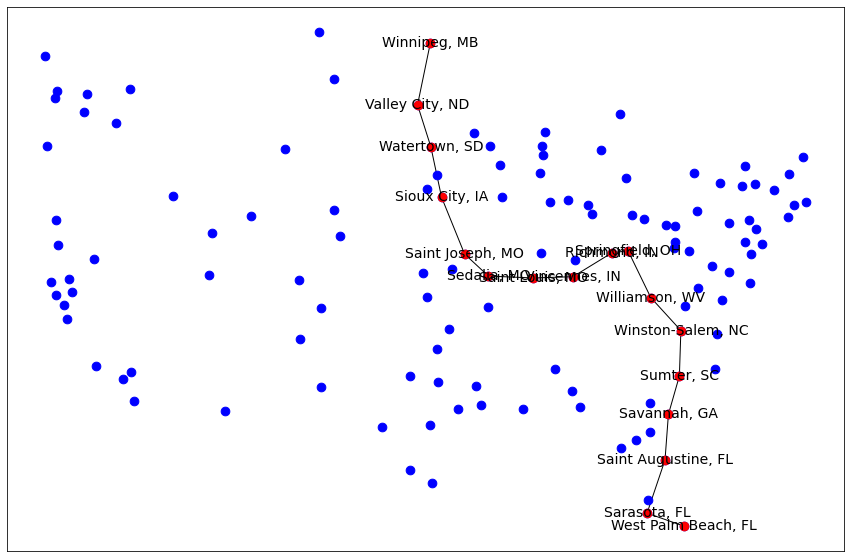

In [18]:
h_weight = 6
astar_path_h = astar_path = nx.astar_path(G, start, destination, heuristic=weighted_distance, weight='drive')
print(astar_path_h)

plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(G, pos=G_pos, node_size=75, node_color='blue')
nx.draw_networkx(G.subgraph(astar_path_h), pos=G_pos, node_size=75, node_color='red', font_size=14)

print('\nTotal Path Length:')
print('Euclidean = {} miles'.format(path_length(astar_path_h, 'euclidean')))
print('Road = {} miles'.format(path_length(astar_path_h, 'road')))

#### Heuristic Weight = 7 (Same result as 6)

#### Heuristic Weight = 8 (Same result as 6)

#### Heuristic Weight = 9 (Same result as 6)

#### Heuristic Weight = 10

['Winnipeg, MB', 'Valley City, ND', 'Watertown, SD', 'Sioux City, IA', 'Saint Joseph, MO', 'Sedalia, MO', 'Saint Louis, MO', 'Vincennes, IN', 'Richmond, IN', 'Springfield, OH', 'Williamson, WV', 'Winston-Salem, NC', 'Sumter, SC', 'Savannah, GA', 'Saint Augustine, FL', 'Sarasota, FL', 'West Palm Beach, FL']

Total Path Length:
Euclidean = 2733.6810630995165 miles
Road = 3126.0 miles


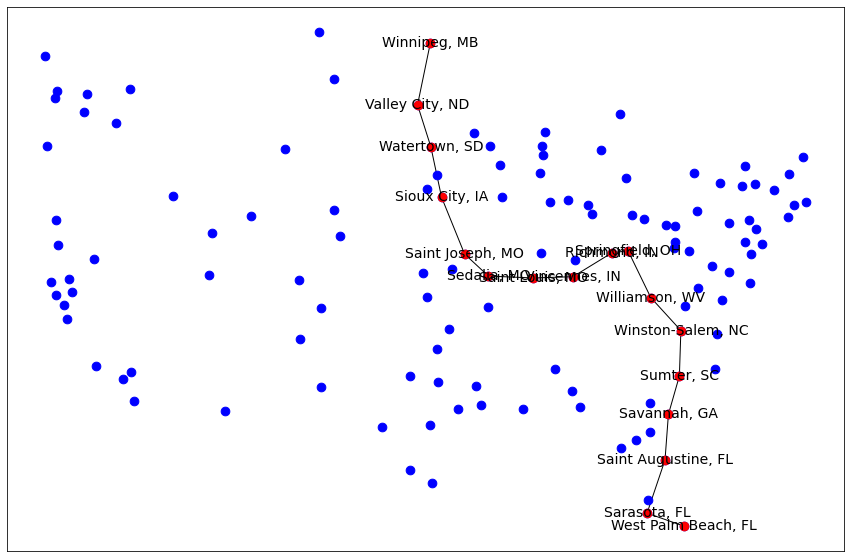

In [19]:
h_weight = 100000
astar_path_h = astar_path = nx.astar_path(G, start, destination, heuristic=weighted_distance, weight='drive')
print(astar_path_h)

plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(G, pos=G_pos, node_size=75, node_color='blue')
nx.draw_networkx(G.subgraph(astar_path_h), pos=G_pos, node_size=75, node_color='red', font_size=14)

print('\nTotal Path Length:')
print('Euclidean = {} miles'.format(path_length(astar_path_h, 'euclidean')))
print('Road = {} miles'.format(path_length(astar_path_h, 'road')))

#### Comments:
Adding the heuristic increased the total distance of the path.

The solution changed when the heuristic weight was 4 and 6. Increasing the weight past 6 does not seem to change the path.

### Dijkstra Shortest Path

['Winnipeg, MB', 'Valley City, ND', 'Watertown, SD', 'Saint Cloud, MN', 'Rochester, MN', 'Wisconsin Dells, WI', 'Waukegan, IL', 'South Bend, IN', 'Springfield, OH', 'Williamson, WV', 'Winston-Salem, NC', 'Sumter, SC', 'Savannah, GA', 'Waycross, GA', 'Tampa, FL', 'West Palm Beach, FL']

Total Path Length:
Euclidean = 2579.0928655741372 miles
Road = 2888.0 miles


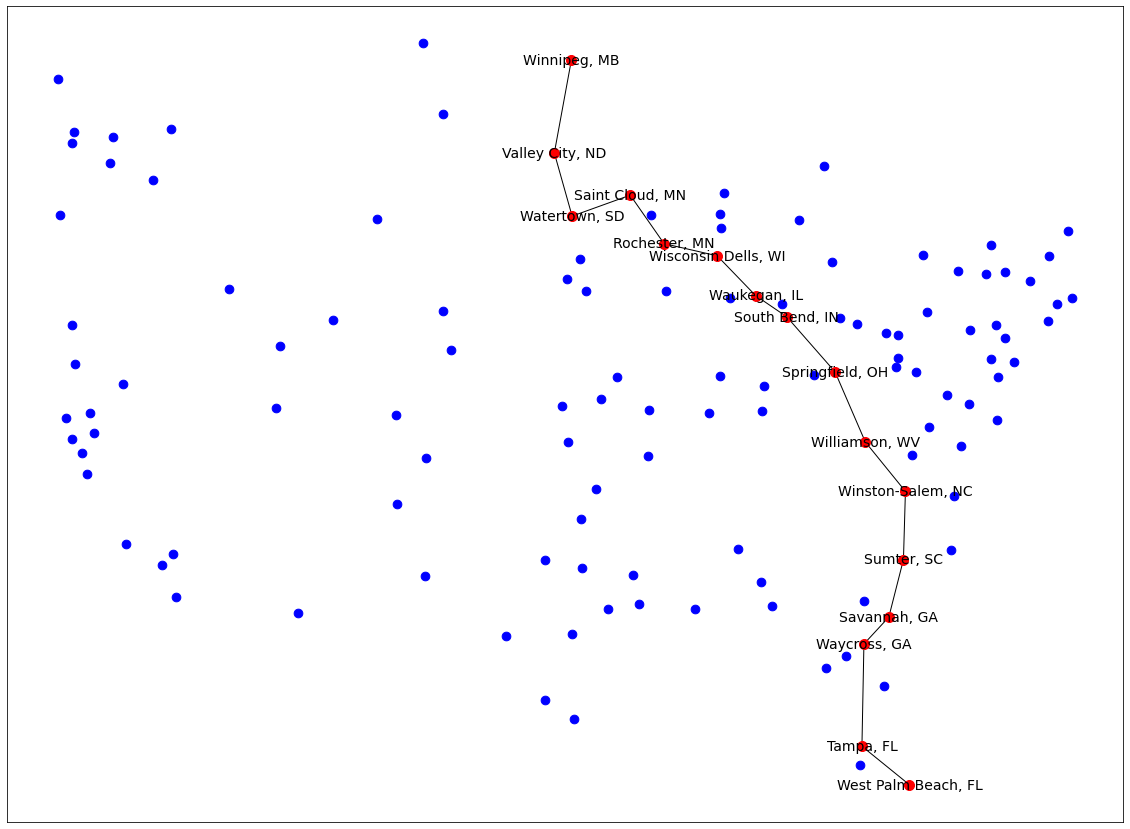

In [20]:
dijkstra_path = nx.dijkstra_path(G, start, destination, weight='drive')
print(dijkstra_path)

plt.figure(figsize=(20, 15))
nx.draw_networkx_nodes(G, pos=G_pos, node_size=75, node_color='blue')
nx.draw_networkx(G.subgraph(dijkstra_path), pos=G_pos, node_size=100, node_color='red', font_size=14)

print('\nTotal Path Length:')
print('Euclidean = {} miles'.format(path_length(dijkstra_path, 'euclidean')))
print('Road = {} miles'.format(path_length(dijkstra_path, 'road')))

#### Comments:
The path calculated by the Dijkstra algorithm is the same as A* with no heuristic, up to A* with a heuristic weight of 4.

## Neo4j Output

In [21]:
nx.write_graphml(G, 'C:\\Users\\jesus\\OneDrive\\Documents\\Jupyter\\CMPE252\\SearchAlgo\\sgb128.graphml')

KeyError: <class 'tuple'>